<a href="https://colab.research.google.com/github/akiwelekar/MyQCPortfolio/blob/main/DDeutsch-Jozsa/Deutsch_JozsaAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the Deutsch-Jozsa Algorithm

This notebook demonstrates the Deutsch-Jozsa algorithm, a quantum algorithm designed to solve a specific problem faster than any classical algorithm. The problem is to determine if a given function is "constant" (always outputs the same value) or "balanced" (outputs 0 for half of the inputs and 1 for the other half). The algorithm achieves this by using quantum superposition and interference.

Let's break down the code step by step.

### 1. Setting up the Environment

First, we install and import the necessary libraries: Qiskit for building and simulating quantum circuits, and Matplotlib for plotting the results.

In [21]:
!pip install qiskit qiskit[visualization]
!pip install --upgrade qiskit
!pip install qiskit_aer

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator as Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import ZGate
import matplotlib.pyplot as plt
from IPython.display import display

### 2. Defining the Oracle

The "oracle" is a quantum circuit that represents the function we want to test. In this case, we are using a balanced function where the output is 1 if the input is 01 or 10 (binary). The oracle flips the phase of the output qubit based on the input.

In [22]:
# Define oracle for balanced function f(x) = x1 XOR x0 (i.e. 1 if x = 01 or 10)
# This oracle flips the phase of the output qubit if the input is 01 or 10.
oracle = QuantumCircuit(3, name='oracle') # Added a name for clarity
oracle.cx(0, 2) # CNOT gate with control on qubit 0 and target on qubit 2
oracle.cx(1, 2) # CNOT gate with control on qubit 1 and target on qubit 2

### 3. Building the Deutsch-Jozsa Circuit

This is the main circuit where we apply a series of quantum gates to the qubits.

- We use 3 qubits: 2 for input (qubits 0 and 1) and 1 for output (qubit 2).
- We also use 2 classical bits to store the measurement results of the input qubits.

In [23]:
# Full Deutsch-Jozsa circuit
# We use 3 qubits: 2 for input (0 and 1) and 1 for output (2).
# We use 2 classical bits to store the measurement results of the input qubits.
dj = QuantumCircuit(3, 2)

# Step 1: Initialize input qubits to |0⟩ and output qubit to |1⟩
dj.x(2)          # Apply X gate to the output qubit (qubit 2) to put it in the |1⟩ state
dj.h([0,1,2])    # Apply Hadamard gate to all qubits.
                 # This creates a superposition of all possible input states for qubits 0 and 1,
                 # and puts the output qubit in the (|0⟩ - |1⟩)/sqrt(2) state (often called the |-> state).

# Step 2: Apply oracle
# The oracle is appended to the circuit, acting on the input and output qubits.
dj.append(oracle.to_gate(), [0,1,2])

# Step 3: Apply Hadamard to input qubits again
# Applying Hadamard to the input qubits (0 and 1) again.
# If the function is constant, the input qubits will return to the |00⟩ state.
# If the function is balanced, the input qubits will be in a superposition that
# when measured, will result in a non-zero value (either 01, 10, or 11).
dj.h([0,1])

# Step 4: Measure input qubits
# Measure the input qubits (0 and 1) and store the results in the classical bits (0 and 1).
# For a balanced function, the measurement result will be non-zero (at least one of the bits will be 1).
# For a constant function, the measurement result will be 00.
dj.measure([0,1], [0,1])

### 4. Running the Simulation and Analyzing Results

Finally, we run the quantum circuit on a simulator and analyze the measurement results.

- We use the `AerSimulator` from `qiskit_aer` to simulate the quantum computer.
- We `transpile` the circuit to optimize it for the simulator.
- We run the simulation multiple times (`shots=1024`) to get statistically significant results.
- The `plot_histogram` function visualizes the measurement counts.

For a balanced function, you should see measurement results other than '00'. If it were a constant function, you would only see '00'.

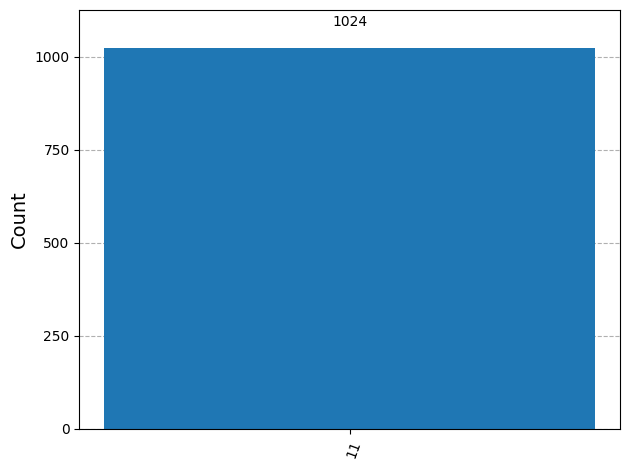

In [24]:
# Run the simulation
backend = Aer() # Use the Aer simulator from Qiskit Aer

# Transpile the circuit for the backend
# Transpilation optimizes the circuit for the specific backend.
transpiled_dj = transpile(dj, backend)

# Run the transpiled circuit on the backend
# We run the circuit 1024 times (shots) to get measurement counts.
result = backend.run(transpiled_dj, shots=1024).result()
counts = result.get_counts() # Get the measurement counts

# Display the histogram of the measurement counts
display(plot_histogram(counts))
plt.show() # Show the plot

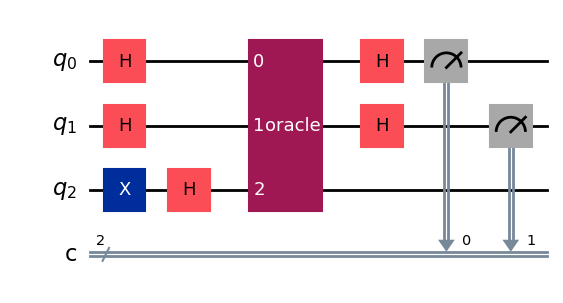

In [42]:
# Draw the circuit
display(dj.draw(output='mpl'))